In [2]:
# install nnunetv2
!pip install nnunetv2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [3]:
# check nnunetv2
import nnunetv2

In [4]:
# Make Directory to store Models
!mkdir -p /kaggle/working/nnUNet_models/Dataset500_KiTS2023

In [5]:
# Make Directory to align with nnUNet
!mkdir -p /kaggle/working/nnUNet_raw

In [6]:
# Make Directory to align with nnUNet
!mkdir -p /kaggle/working/nnUNet_preprocessed

In [9]:
# Dir. to store inferencing results
!mkdir -p /kaggle/working/results

In [7]:
import os

# Raw data (can be empty if you only do inference)
os.environ["nnUNet_raw"] = "/kaggle/working/nnUNet_raw"

# Preprocessed data (can be empty if you only do inference)
os.environ["nnUNet_preprocessed"] = "/kaggle/working/nnUNet_preprocessed"

# Model results folder (where your Dataset700_MYTASK lives)
os.environ["nnUNet_results"] = "/kaggle/working/nnUNet_models"


In [8]:
!mkdir -p /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/

In [16]:
# #Code to remove file
# import os

# file_path = "/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_001_0000.nii.gz"

# if os.path.exists(file_path):
#     os.remove(file_path)
#     print("File deleted:", file_path)
# else:
#     print("File not found:", file_path)


File deleted: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_001_0000.nii.gz


In [11]:
# # Code to remove folder
# import shutil

# folder_path = "/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances"

# # Remove the folder and everything inside
# shutil.rmtree(folder_path)


In [12]:
# copy model into working dir.
!cp -r /kaggle/input/nnunet2nd/pytorch/default/1/pretrained_models/nnUNetTrainer__nnUNetPlans__3d_fullres_batch_4_all /kaggle/working/nnUNet_models/Dataset500_KiTS2023/

In [13]:
# import dataset from gdrive
import gdown
output_path = "/kaggle/working/output/"

# Google Drive file ID
file_id = "1qdVdcfJnTZmHimg6we0wh6ea_ecvhOwG"
url = f"https://drive.google.com/uc?id={file_id}"

# Download
gdown.download(url, output_path, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1qdVdcfJnTZmHimg6we0wh6ea_ecvhOwG
From (redirected): https://drive.google.com/uc?id=1qdVdcfJnTZmHimg6we0wh6ea_ecvhOwG&confirm=t&uuid=05acc21a-bf42-45e3-bbc5-54b2eac0d172
To: /kaggle/working/output/inference_sample.zip
100%|██████████| 811M/811M [00:14<00:00, 55.7MB/s] 


'/kaggle/working/output/inference_sample.zip'

In [14]:
# Unzip the dataset
!unzip /kaggle/working/output/inference_sample.zip -d /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/

Archive:  /kaggle/working/output/inference_sample.zip
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_005_0000.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_001_0000.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_002_0000.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_003_0000.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_004_0000.nii.gz  


In [14]:
# Run the Prediction 
!nnUNetv2_predict -i /kaggle/working/nnUNet_raw/Dataset500_KiTS2023 -o /kaggle/working/results/ -d 500 -c 3d_fullres_batch_4_all -f all


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

/usr/local/lib/python3.11/dist-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start

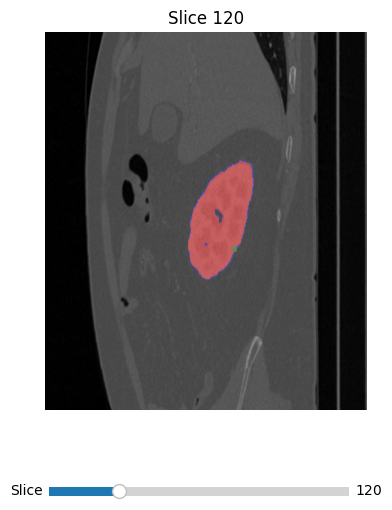

In [16]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.colors import ListedColormap

# Paths
ct_path = "/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_001_0000.nii.gz"
seg_path = "/kaggle/working/results/imaging_001.nii.gz"

# Load images
ct_img = nib.load(ct_path)
ct_data = ct_img.get_fdata()

seg_img = nib.load(seg_path)
seg_data = seg_img.get_fdata().astype(int)

# Create color map for segmentation: 0=black, 1=blue (kidney), 2=red (tumor), 3=green (cyst)
cmap = ListedColormap(['black', 'blue', 'red', 'green'])

# Initial slice
slice_idx = 120

# Plot setup
fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.25)
img_plot = ax.imshow(ct_data[:, :, slice_idx], cmap='gray')
overlay = ax.imshow(seg_data[:, :, slice_idx], cmap=cmap, alpha=0.4)
ax.set_title(f'Slice {slice_idx}')
ax.axis('off')

# Slider
ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03])
slider = Slider(ax_slider, 'Slice', 0, ct_data.shape[2]-1, valinit=slice_idx, valstep=1)

def update(val):
    idx = int(slider.val)
    img_plot.set_data(ct_data[:, :, idx])
    overlay.set_data(seg_data[:, :, idx])
    ax.set_title(f'Slice {idx}')
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()


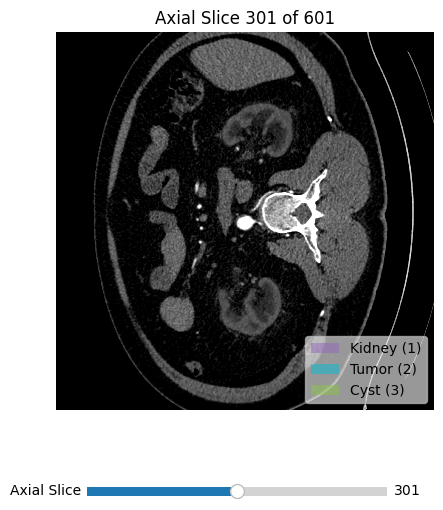

In [17]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Paths
ct_path = "/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_001_0000.nii.gz"
seg_path = "/kaggle/working/results/imaging_001.nii.gz"

# Load images
ct_img = nib.load(ct_path)
ct_data = ct_img.get_fdata()

seg_img = nib.load(seg_path)
seg_data = seg_img.get_fdata().astype(int)
# --- 1. Custom Colors and Masking ---
colors = ['#000000', '#9467BD', '#00BCD4', '#8BC34A']
cmap = ListedColormap(colors)
# NOTE: Masking must use the full 3D data initially
masked_seg_data = np.ma.masked_where(seg_data == 0, seg_data)
cmap.set_bad(color='none', alpha=0.0)

# --- 2. Function to Get Correct Axial Slice ---
def get_axial_slice(data_3d, index, axis=0):
    # **FIX:** Slice along the specified 'axis' (defaulting to 0)
    if axis == 0:
        slice_2d = data_3d[index, :, :]
    elif axis == 1:
        slice_2d = data_3d[:, index, :]
    elif axis == 2:
        # Fallback to the original method, but we know this is likely wrong for your data
        slice_2d = data_3d[:, :, index]
    else:
        raise ValueError("Axis must be 0, 1, or 2.")
    
    # We may still need to transpose or rotate the resulting 2D array
    # to correct for typical display orientation (patient's right on the left).
    # Since we are slicing along a new dimension, we transpose/rotate differently.
    # Let's try np.transpose first, or simply slice_2d.
    return slice_2d.T # Transposing is often required when slicing on axis 0 or 1

def get_masked_axial_slice(data_3d, index, axis=0):
    # Uses the pre-masked array, and applies the same slicing/rotation logic
    if axis == 0:
        masked_slice = masked_seg_data[index, :, :]
    elif axis == 1:
        masked_slice = masked_seg_data[:, index, :]
    else:
        masked_slice = masked_seg_data[:, :, index]
        
    return masked_slice.T # Apply the same transpose

# --- 3. Initial Axial Slice Setup ---
# The number of slices is now ct_data.shape[0]
AXIAL_AXIS = 0
MAX_SLICES = ct_data.shape[AXIAL_AXIS]
slice_idx = MAX_SLICES // 2 # Start in the middle

# Plot setup
fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.25)

# Plot the corrected axial slice data
img_plot = ax.imshow(get_axial_slice(ct_data, slice_idx, axis=AXIAL_AXIS), cmap='gray', vmin=-100, vmax=300)
overlay = ax.imshow(get_masked_axial_slice(seg_data, slice_idx, axis=AXIAL_AXIS), cmap=cmap, alpha=0.5, interpolation='none')

ax.set_title(f'Axial Slice {slice_idx} of {MAX_SLICES-1}')
ax.axis('off')

# --- 4. Slider and Update Function ---
ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03])
slider = Slider(ax_slider, 'Axial Slice', 0, MAX_SLICES-1, valinit=slice_idx, valstep=1)

def update(val):
    idx = int(slider.val)
    
    # Update CT data
    img_plot.set_data(get_axial_slice(ct_data, idx, axis=AXIAL_AXIS))
    
    # Update segmentation overlay
    overlay.set_data(get_masked_axial_slice(seg_data, idx, axis=AXIAL_AXIS))
    
    ax.set_title(f'Axial Slice {idx} of {MAX_SLICES-1}')
    fig.canvas.draw_idle()

slider.on_changed(update)

# --- 5. Legend ---
legend_elements = [
    Patch(facecolor='#9467BD', alpha=0.5, label='Kidney (1)'),
    Patch(facecolor='#00BCD4', alpha=0.5, label='Tumor (2)'),
    Patch(facecolor='#8BC34A', alpha=0.5, label='Cyst (3)')
]
ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1.0, 0.0), framealpha=0.6)

plt.show()

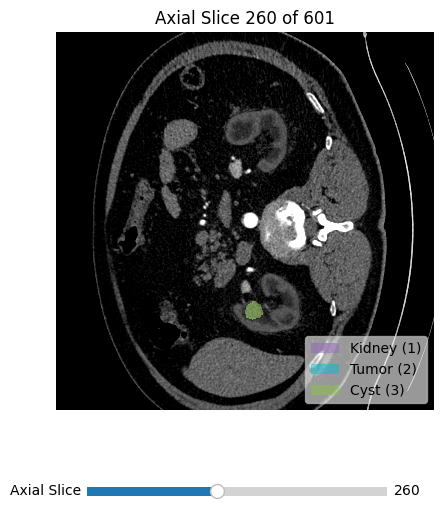

In [18]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch


# Paths
ct_path = "/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_001_0000.nii.gz"
seg_path = "/kaggle/working/results/imaging_001.nii.gz"

# Load images
ct_img = nib.load(ct_path)
ct_data = ct_img.get_fdata()

seg_img = nib.load(seg_path)
seg_data = seg_img.get_fdata().astype(int)

# --- 1. Custom Colors and Masking (Same as before) ---
colors = ['#000000', '#9467BD', '#00BCD4', '#8BC34A']
cmap = ListedColormap(colors)
masked_seg_data = np.ma.masked_where(seg_data == 0, seg_data)
cmap.set_bad(color='none', alpha=0.0)

# --- 2. Function to Get Correct Axial Slice ---
def get_axial_slice(data_3d, index, axis=0):
    if axis == 0:
        slice_2d = data_3d[index, :, :]
    elif axis == 1:
        slice_2d = data_3d[:, index, :]
    else:
        slice_2d = data_3d[:, :, index]
    
    # FIX ROTATION: Use np.rot90 instead of .T to correct orientation
    # k=1 rotates 90 degrees CCW, k=3 rotates 270 degrees CCW (90 degrees CW)
    # This value is often found through trial and error (try k=1, 2, or 3)
    return np.rot90(slice_2d, k=1) 

def get_masked_axial_slice(data_3d, index, axis=0):
    if axis == 0:
        masked_slice = masked_seg_data[index, :, :]
    elif axis == 1:
        masked_slice = masked_seg_data[:, index, :]
    else:
        masked_slice = masked_seg_data[:, :, index]
        
    # FIX ROTATION: Apply the same rotation
    return np.rot90(masked_slice, k=1) 

# --- 3. Initial Axial Slice Setup ---
AXIAL_AXIS = 0 
MAX_SLICES = ct_data.shape[AXIAL_AXIS]
# FIX COLORS: Set initial slice to a value where structures are present (e.g., 150)
slice_idx = 260

# Plot setup
fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.25)

# Plot the corrected axial slice data
img_plot = ax.imshow(get_axial_slice(ct_data, slice_idx, axis=AXIAL_AXIS), cmap='gray', vmin=-100, vmax=300)
overlay = ax.imshow(get_masked_axial_slice(seg_data, slice_idx, axis=AXIAL_AXIS), cmap=cmap, alpha=0.5, interpolation='none')

ax.set_title(f'Axial Slice {slice_idx} of {MAX_SLICES-1}')
ax.axis('off')

# --- 4. Slider and Update Function (Remains the same) ---
ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03])
slider = Slider(ax_slider, 'Axial Slice', 0, MAX_SLICES-1, valinit=slice_idx, valstep=1)

def update(val):
    idx = int(slider.val)
    img_plot.set_data(get_axial_slice(ct_data, idx, axis=AXIAL_AXIS))
    overlay.set_data(get_masked_axial_slice(seg_data, idx, axis=AXIAL_AXIS))
    ax.set_title(f'Axial Slice {idx} of {MAX_SLICES-1}')
    fig.canvas.draw_idle()

slider.on_changed(update)

# --- 5. Legend (Same as before) ---
legend_elements = [
    Patch(facecolor='#9467BD', alpha=0.5, label='Kidney (1)'),
    Patch(facecolor='#00BCD4', alpha=0.5, label='Tumor (2)'),
    Patch(facecolor='#8BC34A', alpha=0.5, label='Cyst (3)')
]
ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1.0, 0.0), framealpha=0.6)

plt.show()

In [19]:
# num_slices = 9
# step = data.shape[2] // num_slices
# fig, axes = plt.subplots(3, 3, figsize=(10, 10))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(data[:, :, i * step], cmap="gray")
#     ax.set_title(f"Slice {i * step}")
#     ax.axis("off")
# plt.tight_layout()
# plt.show()


In [20]:
kits23_compute_metrics FOLDER_WITH_PREDICTIONS -num_processes XX

SyntaxError: invalid syntax (4107209362.py, line 1)

In [9]:
import os
import SimpleITK as sitk

# === Directories ===
input_base = '/kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/imagesTr'
output_base = '/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imagesTr'
os.makedirs(output_base, exist_ok=True)

# === Range of cases to convert (000 → 010) ===
for i in range(0, 10):  # inclusive of 010
    case_id = f"imaging_{i:03d}_0000.nii"
    input_folder = os.path.join(input_base, case_id)
    input_file = os.path.join(input_folder, "imaging.nii")
    output_file = os.path.join(output_base, f"{case_id}.gz")  # final output: imaging_000_0000.nii.gz
    
    print(f"\n📂 Processing: {input_file}")
    
    try:
        # Read input .nii
        img = sitk.ReadImage(input_file)
        
        # Write compressed .nii.gz
        writer = sitk.ImageFileWriter()
        writer.SetFileName(output_file)
        writer.UseCompressionOn()
        writer.Execute(img)
        
        # Show success message
        print(f"✅ Saved compressed file: {output_file}")
        
        # Optional: check size
        original_size = os.path.getsize(input_file) / (1024 * 1024)
        compressed_size = os.path.getsize(output_file) / (1024 * 1024)
        print(f"   Original: {original_size:.2f} MB | Compressed: {compressed_size:.2f} MB")
        
    except Exception as e:
        print(f"❌ Error processing {input_file}: {e}")

print("\n🎉 All files from imaging_000 → imaging_010 processed successfully!")


📂 Processing: /kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/imagesTr/imaging_000_0000.nii/imaging.nii
✅ Saved compressed file: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imagesTr/imaging_000_0000.nii.gz
   Original: 1222.00 MB | Compressed: 158.84 MB

📂 Processing: /kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/imagesTr/imaging_001_0000.nii/imaging.nii
✅ Saved compressed file: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imagesTr/imaging_001_0000.nii.gz
   Original: 1204.00 MB | Compressed: 199.54 MB

📂 Processing: /kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/imagesTr/imaging_002_0000.nii/imaging.nii
✅ Saved compressed file: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imagesTr/imaging_002_0000.nii.gz
   Original: 522.00 MB | Compressed: 72.11 MB

📂 Processing: /kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/imagesTr/imaging_003_0000.nii/imaging.nii
✅ Saved compressed file: /kaggle/working/nnUNet_raw/Dataset500_KiTS

In [10]:
import os
import SimpleITK as sitk

# === Directories ===
input_base = '/kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/labelsTr'
output_base = '/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/labelsTr'
os.makedirs(output_base, exist_ok=True)

# === Range of cases to convert (000 → 010) ===
for i in range(0, 10):  # inclusive of 010
    case_id = f"imaging_{i:03d}.nii"
    input_folder = os.path.join(input_base, f"segmentation_{i:03d}.nii")
    input_file = os.path.join(input_folder, "segmentation.nii")
    output_file = os.path.join(output_base, f"{case_id}.gz")  # final output: imaging_000_0000.nii.gz
    
    print(f"\n📂 Processing: {input_file}")
    
    try:
        # Read input .nii
        img = sitk.ReadImage(input_file)
        
        # Write compressed .nii.gz
        writer = sitk.ImageFileWriter()
        writer.SetFileName(output_file)
        writer.UseCompressionOn()
        writer.Execute(img)
        
        # Show success message
        print(f"✅ Saved compressed file: {output_file}")
        
        # Optional: check size
        original_size = os.path.getsize(input_file) / (1024 * 1024)
        compressed_size = os.path.getsize(output_file) / (1024 * 1024)
        print(f"   Original: {original_size:.2f} MB | Compressed: {compressed_size:.2f} MB")
        
    except Exception as e:
        print(f"❌ Error processing {input_file}: {e}")

print("\n🎉 All files from imaging_000 → imaging_010 processed successfully!")


📂 Processing: /kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/labelsTr/segmentation_000.nii/segmentation.nii
✅ Saved compressed file: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/labelsTr/imaging_000.nii.gz
   Original: 152.75 MB | Compressed: 0.19 MB

📂 Processing: /kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/labelsTr/segmentation_001.nii/segmentation.nii
✅ Saved compressed file: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/labelsTr/imaging_001.nii.gz
   Original: 150.50 MB | Compressed: 0.23 MB

📂 Processing: /kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/labelsTr/segmentation_002.nii/segmentation.nii
✅ Saved compressed file: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/labelsTr/imaging_002.nii.gz
   Original: 65.25 MB | Compressed: 0.10 MB

📂 Processing: /kaggle/input/nnunet-sample-data/nnUNet_raw/Dataset700_KiTS23/labelsTr/segmentation_003.nii/segmentation.nii
✅ Saved compressed file: /kaggle/working/nnUNet_raw/Dataset500_KiTS202

In [16]:
!cp /kaggle/input/jsonfile/dataset.json /kaggle/working/nnUNet_raw/Dataset500_KiTS2023

In [18]:
!nnUNetv2_plan_and_preprocess -d 500 -c 3d_fullres --verify_dataset_integrity

Fingerprint extraction...
Dataset500_KiTS2023
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
100%|███████████████████████████████████████████| 10/10 [00:33<00:00,  3.33s/it]
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Attempting to find 3d_lowres config. 
Current spacing: [2.         0.91432617 0.91432617]. 
Current patch size: (56, 192, 192). 
Current median shape: [142.5        497.08737864 497.08737864]
Attempting to find 3d_lowres config. 
Current spacing:

In [26]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True

In [30]:
!export TORCHINDUCTOR_DISABLE=1
!export TORCH_LOGS=""
!export TORCHDYNAMO_VERBOSE=0

In [31]:
!nnUNetv2_train Dataset500_KiTS2023 3d_fullres all


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-10-18 21:31:27.419994: Using torch.compile...
2025-10-18 21:31:28.375721: do_dummy_2d_data_aug: True
using pin_memory on device 0
using pin_memory on device 0

This is the configuration used by this training:
Configuration name: 3d_fullres
 {'data_identifier': 'nnUNetPlans_3d_fullres', 'pre